In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def tanh(x):
    return np.tanh(x)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

Text(0.5, 1.0, 'tanh')

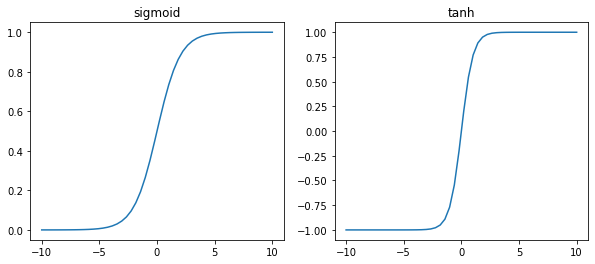

In [3]:
plt.figure(figsize=[10, 4])
x = np.linspace(-10, 10)

plt.subplot(1, 2, 1)
plt.plot(x, sigmoid(x))
plt.title('sigmoid')

plt.subplot(1, 2, 2)
plt.plot(x, tanh(x))
plt.title('tanh')

# Generate Sample Dataset
generate a simple binary classification task with 5000 data points and 20 features for later model validation.

In [4]:
from sklearn import datasets

X, y = datasets.make_classification(n_samples=5000, random_state=123)

X_train, X_test = X[:4000], X[4000:]
y_train, y_test = y[:4000], y[4000:]

print('train shape', X_train.shape)
print('test shape', X_test.shape)

train shape (4000, 20)
test shape (1000, 20)


# Weights Initialization

In [5]:
# Weights Initialization
def init_weights(n_input, n_hidden, n_output):
    params = {}
    params['W1'] = np.random.randn(n_hidden, n_input) * 0.01
    params['b1'] = np.zeros((n_hidden, 1))
    params['W2'] = np.random.randn(n_output, n_hidden) * 0.01
    params['b2'] = np.zeros((n_output, 1))
    
    return params
  
  
params = init_weights(20, 10, 1)

print('W1 shape', params['W1'].shape)
print('b1 shape', params['b1'].shape)
print('W2 shape', params['W2'].shape)
print('b2 shape', params['b2'].shape)

W1 shape (10, 20)
b1 shape (10, 1)
W2 shape (1, 10)
b2 shape (1, 1)


# Forward Propagation

In [6]:
def forward(X, params):
    """
    X: need to have shape (n_features x m_samples)
    """
    W1, b1, W2, b2 = params['W1'], params['b1'], params['W2'], params['b2']
    A0 = X
    
    cache = {}
    Z1 = np.dot(W1, A0) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache['Z1'] = Z1
    cache['A1'] = A1
    cache['Z2'] = Z2
    cache['A2'] = A2
    return  cache

# Loss Function

In [7]:
def loss(Y, Y_hat):
    """
    Y: vector of true value
    Y_hat: vector of predicted value
    """
    assert Y.shape[0] == 1
    assert Y.shape == Y_hat.shape
    m = Y.shape[1]
    s = Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat)
    loss = -np.sum(s) / m
    return loss

In [8]:
Y = np.array([np.random.choice([0, 1])
for i in range(10)]).reshape(1, -1)
Y_hat = np.random.uniform(0, 1, 10).reshape(1, -1)

l = loss(Y, Y_hat)
print(f'loss {l}')

loss 0.8348196603835148


# Back Propagation

In [9]:
def backward(params, cache, X, Y):
    """
    [From coursera deep-learning course]
    params: we initiate above with W1, b1, W2, b2
    cache: the intermediate caculation we saved with Z1, A1, Z2, A2
    X: shape of (n_x, m)
    Y: shape (n_y, m)
    """
    
    m = X.shape[1]

    W1 = params['W1']
    W2 = params['W2']
    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

# Batch Loader
 * Ensemble everything into a class.

In [10]:
class ShallowNN:
    def __init__(self, n_input, n_hidden, n_output):
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output = n_output
        self.params = {}
        self.cache = {}
        self.grads = {}
        
    def compute_loss(self, Y, Y_hat):
        """
        Y: vector of true value
        Y_hat: vector of predicted value
        """
        assert Y.shape[0] == 1
        assert Y.shape == Y_hat.shape
        m = Y.shape[1]
        s = Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat)
        loss = -np.sum(s) / m
        return loss
    
    
    def init_weights(self):
        self.params['W1'] = np.random.randn(self.n_hidden, self.n_input) * 0.01
        self.params['b1'] = np.zeros((self.n_hidden, 1))
        self.params['W2'] = np.random.randn(self.n_output, self.n_hidden) * 0.01
        self.params['b2'] = np.zeros((self.n_output, 1))
    
    
    def forward(self, X):
        """
        X: need to have shape (n_features x m_samples)
        """
        W1, b1, W2, b2 = self.params['W1'], self.params['b1'], self.params['W2'], self.params['b2']
        A0 = X

        Z1 = np.dot(W1, A0) + b1
        A1 = tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

        self.cache['Z1'] = Z1
        self.cache['A1'] = A1
        self.cache['Z2'] = Z2
        self.cache['A2'] = A2
     
    
    def backward(self, X, Y):
        """
        [From coursera deep-learning course]
        params: we initiate above with W1, b1, W2, b2
        cache: the intermediate caculation we saved with Z1, A1, Z2, A2
        X: shape of (n_x, m)
        Y: shape (n_y, m)
        """

        m = X.shape[1]

        W1 = self.params['W1']
        W2 = self.params['W2']
        A1 = self.cache['A1']
        A2 = self.cache['A2']

        dZ2 = A2 - Y
        dW2 = (1 / m) * np.dot(dZ2, A1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
        dW1 = (1 / m) * np.dot(dZ1, X.T)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

        self.grads = {"dW1": dW1,
                      "db1": db1,
                      "dW2": dW2,
                      "db2": db2}

        
    def get_batch_indices(self, X_train, batch_size):
        n = X_train.shape[0]
        indices = [range(i, i+batch_size) for i in range(0, n, batch_size)]
        return indices
    
    
    def update_weights(self, lr):
        W1, b1, W2, b2 = self.params['W1'], self.params['b1'], self.params['W2'], self.params['b2']
        dW1, db1, dW2, db2 = self.grads['dW1'], self.grads['db1'], self.grads['dW2'], self.grads['db2']
        self.params['W1'] -= dW1
        self.params['W2'] -= dW2
        self.params['b1'] -= db1
        self.params['b2'] -= db2
    
    
    def fit(self, X_train, y_train, batch_size=32, n_iterations=100, lr=0.01):
        self.init_weights()
        
        indices = self.get_batch_indices(X_train, batch_size)
        for i in range(n_iterations):
            for ind in indices:
                X = X_train[ind, :].T
                Y = y_train[ind].reshape(1, batch_size)
                
                self.forward(X)
                self.backward(X, Y)
                self.update_weights(lr)
            
            if i % 10 == 0:
                Y_hat = self.cache['A2']
                loss = self.compute_loss(Y, Y_hat)
                print(f'iteration {i}: loss {loss}')
            
            
    def predict(self, X):
        W1, b1, W2, b2 = self.params['W1'], self.params['b1'], self.params['W2'], self.params['b2']
        A0 = X

        Z1 = np.dot(W1, A0) + b1
        A1 = tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

        return A2

    
def accuracy(Y, Y_pred):
    """
    Y: vector of true value
    Y_pred: vector of predicted value
    """
    def _to_binary(x):
        return 1 if x > .5 else 0

    assert Y.shape[0] == 1
    assert Y.shape == Y_pred.shape
    Y_pred = np.vectorize(_to_binary)(Y_pred)
    acc = float(np.dot(Y, Y_pred.T) + np.dot(1 - Y, 1 - Y_pred.T))/Y.size
    return acc

# Batch Training

In [11]:
model = ShallowNN(20,10,1)

# Fit the Model

In [12]:
model.fit(X_train, y_train, batch_size=100, n_iterations=200, lr=0.01)

iteration 0: loss 0.1978708150213788
iteration 10: loss 0.09026504287585717
iteration 20: loss 0.08232531089864624
iteration 30: loss 0.07858080612317006
iteration 40: loss 0.07088022626405677
iteration 50: loss 0.06190475098705685
iteration 60: loss 0.051490523654463834
iteration 70: loss 0.04185756915442096
iteration 80: loss 0.032456481894594165
iteration 90: loss 0.028166038429023422
iteration 100: loss 0.026742677524181243
iteration 110: loss 0.026012736601906436
iteration 120: loss 0.025721107468478114
iteration 130: loss 0.025747606350268334
iteration 140: loss 0.025674147186837123
iteration 150: loss 0.025620801377907294
iteration 160: loss 0.025565290155039565
iteration 170: loss 0.02545221649413372
iteration 180: loss 0.025025942333109327
iteration 190: loss 0.02440504894879744


# Accuracy

In [13]:
y_preds = model.predict(X_test.T)

acc = accuracy(y_test.reshape(1,-1), y_preds)
print(f'accuracy: {acc*100}%')

accuracy: 94.39999999999999%


# Using Keras Library implement shallow neural network

In [14]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense

In [15]:
# Traing Data
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], "float32")

output_data = np.array([[0], [1], [1], [0]], "float32")

In [16]:
# Setting up the model
model = Sequential()
model.add(Dense(16, input_dim=2, activation='sigmoid'))# 1 hidden layer
model.add(Dense(1, activation='sigmoid'))# output layer

In [17]:
# Training the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])

In [18]:
model.fit(input_data, output_data, epochs=500, verbose=2)

Epoch 1/500
1/1 - 1s - loss: 0.2534 - binary_accuracy: 0.5000 - 1s/epoch - 1s/step
Epoch 2/500
1/1 - 0s - loss: 0.2531 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step
Epoch 3/500
1/1 - 0s - loss: 0.2528 - binary_accuracy: 0.5000 - 0s/epoch - 0s/step
Epoch 4/500
1/1 - 0s - loss: 0.2525 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step
Epoch 5/500
1/1 - 0s - loss: 0.2523 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step
Epoch 6/500
1/1 - 0s - loss: 0.2520 - binary_accuracy: 0.5000 - 0s/epoch - 0s/step
Epoch 7/500
1/1 - 0s - loss: 0.2518 - binary_accuracy: 0.5000 - 0s/epoch - 0s/step
Epoch 8/500
1/1 - 0s - loss: 0.2515 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step
Epoch 9/500
1/1 - 0s - loss: 0.2513 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step
Epoch 10/500
1/1 - 0s - loss: 0.2512 - binary_accuracy: 0.5000 - 0s/epoch - 0s/step
Epoch 11/500
1/1 - 0s - loss: 0.2510 - binary_accuracy: 0.5000 - 0s/epoch - 0s/step
Epoch 12/500
1/1 - 0s - loss: 0.2508 - binary_accuracy: 0.5000 - 

In [19]:
# Testing the model
print(model.predict(input_data).round())

1/1 [==============================] - 0s 333ms/step
[[0.]
 [1.]
 [1.]
 [1.]]
